In [1]:
# 1

########### 15 July 2021 ##########
######### Alec Hirschauer #########
#
# In this notebook, we will be creating the LAMPTAB file(s)
# for the G130M 1291, 1300, 1309, 1318, and 1321 cenwaves at LP5,
# plus the G140L 800 cenwave at LP3.
#
# This is an all-in-one notebook combining the work from two
# previous notebooks from 22 April 2021 and 14 June 2021
# which focus on G140L/c800 and G130M, respectively.
#
# It also improves on an earlier notebook from 28 June 2021,
# which produced _lamp.fits and _disp.fits files that
# had non-updated intensities.
#
# Elaine helped me out a TON with this, so thank you!


In [2]:
# 2

# The first thing we need to do is import the relevant packages.

import calcos
from astropy.io import fits
import glob
import numpy as np

# Obviously we'll need CalCOS to process the COS data, but also
# astropy's fits to handle the .fits files, glob (which allows for
# manipulating data with similar file names), and numpy to do some
# sorting of the data based on .fits file header information.


In [3]:
# 3

# In my directory with all my data, I want to specify only some files
# to work on, from the vast assortment of files (I downloaded both the
# raw files and the processed files; clearly all we really need here are
# the unprocessed, raw files).
#
# Set a variable called "rawtags" with glob to specify only the files in
# this working directory that have the word "rawtag" in it:

rawtags = glob.glob('*_rawtag_*.fits')


In [4]:
# 4

# From here, we can print out a list of the files set by the command above,

#print(rawtags)

# or print out the whole header of the first file (index[0]),

#fits.getheader(rawtags[0])

# but the next *useful* thing to do is set a consistent 'RANDSEED' value
# for every rawtag file, which will be used for important things later on.

for myfile in rawtags:
    fits.setval(myfile, 'RANDSEED', value=123456789)
    
# This dinky for loop takes all the files defined by "rawtags", then uses
# the astropy fits package to set a value for 'RANDSEED' to the very creative
# value of 123456789.
#
# (Note: "myfile" in this case specifies the very last file set by "rawtags".)


In [5]:
# 5

# We can print out the 'RANDSEED' value to show that the last command did its job,

#fits.getval(myfile, 'RANDSEED')

# but that's only if you really need to prove it to yourself.

# What we need to do now, as stipulated in the ISRs for similar work done, is to
# set the various fits header parameters to what they need to be for when we run
# them through CalCOS, in order for them to run the way we want them to.

for myfile in rawtags:
    if fits.getval(myfile, 'OPT_ELEM') == 'G140L':
        fits.setval(myfile, 'FLATCORR', value='PERFORM')
        fits.setval(myfile, 'WAVECORR', value='OMIT')
        fits.setval(myfile, 'TRCECORR', value='OMIT')
        fits.setval(myfile, 'ALGNCORR', value='OMIT')
        fits.setval(myfile, 'XTRCTALG', value='BOXCAR')
        fits.setval(myfile, 'X1DCORR', value='PERFORM')
        fits.setval(myfile, 'BACKCORR', value='OMIT')
        fits.setval(myfile, 'FLUXCORR', value='OMIT')
        fits.setval(myfile, 'HELCORR', value='OMIT')
        fits.setval(myfile, 'GEOCORR', value='PERFORM')
        fits.setval(myfile, 'YWLKCORR', value='PERFORM')
        fits.setval(myfile, 'TEMPCORR', value='PERFORM')
        fits.setval(myfile, 'IGEOCORR', value='PERFORM')
        #fits.setval(myfile, 'XTRACTAB', value='/grp/hst/cos2/LP5_ERA/files_to_use/lp3_1dx.fits')
        #fits.setval(myfile, 'XTRACTAB', value='/grp/hst/cos2/LP5_ERA/files_to_use/lp3_1dx_062821.fits')
        fits.setval(myfile, 'XTRACTAB', value='/grp/hst/cos2/LP5_ERA/files_to_use/lp3_1dx_070721.fits')
        fits.setval(myfile, "LIFE_ADJ", value=3)
    elif fits.getval(myfile, 'OPT_ELEM') == 'G130M':
        fits.setval(myfile, 'FLATCORR', value='PERFORM')
        fits.setval(myfile, 'WAVECORR', value='OMIT')
        fits.setval(myfile, 'TRCECORR', value='OMIT')
        fits.setval(myfile, 'ALGNCORR', value='OMIT')
        fits.setval(myfile, 'XTRCTALG', value='BOXCAR')
        fits.setval(myfile, 'X1DCORR', value='PERFORM')
        fits.setval(myfile, 'BACKCORR', value='OMIT')
        fits.setval(myfile, 'FLUXCORR', value='OMIT')
        fits.setval(myfile, 'HELCORR', value='OMIT')
        fits.setval(myfile, 'GEOCORR', value='PERFORM')
        fits.setval(myfile, 'YWLKCORR', value='PERFORM')
        fits.setval(myfile, 'TEMPCORR', value='PERFORM')
        fits.setval(myfile, 'IGEOCORR', value='PERFORM')
        #fits.setval(myfile, 'XTRACTAB', value='/grp/hst/cos2/LP5_ERA/files_to_use/lp5_1dx.fits')
        #fits.setval(myfile, 'XTRACTAB', value='/grp/hst/cos2/LP5_ERA/files_to_use/lp5_1dx_062821.fits')
        fits.setval(myfile, 'XTRACTAB', value='/grp/hst/cos2/LP5_ERA/files_to_use/lp5_1dx_070721.fits')
        fits.setval(myfile, 'FLATFILE', value='/grp/hst/cos2/LP5_ERA/files_to_use/g130m_xiter2_flat.fits')
        fits.setval(myfile, "LIFE_ADJ", value=5)
        
# Confirm that these parameters are set properly before proceeding!
#
# We are running this all first for the G140L/800 data.
# ^ UPDATE: But now also for the G130M data.
#
# NB the multiple XTRACTAB lines, which got commented out and replaced once
# new, updated versions of these files became available.


In [6]:
# 6

# Next we need to specify the special lamp flash parameters to match what the
# observations are doing in the APT file, whereby the lamp is on for 30 seconds,
# then off for a while (how long and how many times depends on the exposure),
# so that it builds up signal without getting too hot, which could damage it.
#
# For the science exposures of G130M, the exposure times are 210 seconds, with
# 120 seconds of total lamp on time (four flashes), while for the science exposures
# of G140L, the exposure times are 450 seconds, with 240 seconds of total lamp
# time (eight flashes).
#
# Also note that, for the beginning of each Visit, there's a single long exposure
# to settle the OSM, which is 1440 seconds for the two G130M Visits, but 1800 seconds
# for the single G140L Visit.
#
# We'll set this with a large "if" statement written be Elaine, which sets parameters
# like lamp duration (LMPDUR1), the start time of a flash (LMP_ON1), the end time of
# a flash (LMPOFF1), and the median time of that flash (LMPMED1).
#
# For each kind of exposure, we define this for two flashes, then note the number of
# flashes (NUMFLASH), and how to continue the pattern (set TAGFLASH to 'UNIFORMLY SPACED').
#
# Finally, note at what extension each of these parameters should be set to.

for myfile in rawtags:
    if fits.getval(myfile, 'OPT_ELEM') == 'G130M' and fits.getval(myfile, 'EXPTIME', ext=1) < 220.:
        LMPDUR1 = 30.0
        LMP_ON1 = 0.0
        LMPOFF1 = 30.0
        LMPMED1 = 15.00000
        LMPDUR2 = 30.0
        LMP_ON2 = 60.0
        LMPOFF2 = 90.0
        LMPMED2 = 75.00000
        fits.setval(myfile, 'LMPDUR1', value=LMPDUR1, ext=1)
        fits.setval(myfile, 'LMP_ON1', value=LMP_ON1, ext=1)
        fits.setval(myfile, 'LMPOFF1', value=LMPOFF1, ext=1)
        fits.setval(myfile, 'LMPMED1', value=LMPMED1, ext=1)
        fits.setval(myfile, 'LMPDUR2', value=LMPDUR2, ext=1)
        fits.setval(myfile, 'LMP_ON2', value=LMP_ON2, ext=1)
        fits.setval(myfile, 'LMPOFF2', value=LMPOFF2, ext=1)
        fits.setval(myfile, 'LMPMED2', value=LMPMED2, ext=1)
        fits.setval(myfile, 'NUMFLASH', value=4, ext=1)
        fits.setval(myfile, 'TAGFLASH', value='UNIFORMLY SPACED', ext=0)
    elif fits.getval(myfile, 'OPT_ELEM') == 'G130M' and fits.getval(myfile, 'EXPTIME', ext=1) > 220.:
        LMPDUR1 = 30.0
        LMP_ON1 = 0.0
        LMPOFF1 = 30.0
        LMPMED1 = 15.00000
        LMPDUR2 = 30.0
        LMP_ON2 = 120.0
        LMPOFF2 = 150.0
        LMPMED2 = 135.00000
        fits.setval(myfile, 'LMPDUR1', value=LMPDUR1, ext=1)
        fits.setval(myfile, 'LMP_ON1', value=LMP_ON1, ext=1)
        fits.setval(myfile, 'LMPOFF1', value=LMPOFF1, ext=1)
        fits.setval(myfile, 'LMPMED1', value=LMPMED1, ext=1)
        fits.setval(myfile, 'LMPDUR2', value=LMPDUR2, ext=1)
        fits.setval(myfile, 'LMP_ON2', value=LMP_ON2, ext=1)
        fits.setval(myfile, 'LMPOFF2', value=LMPOFF2, ext=1)
        fits.setval(myfile, 'LMPMED2', value=LMPMED2, ext=1)
        fits.setval(myfile, 'NUMFLASH', value=12, ext=1)
        fits.setval(myfile, 'TAGFLASH', value='UNIFORMLY SPACED', ext=0)
    elif fits.getval(myfile, 'OPT_ELEM') == 'G140L' and fits.getval(myfile, 'EXPTIME', ext=1) < 460.:
        LMPDUR1 = 30.0
        LMP_ON1 = 0.0
        LMPOFF1 = 30.0
        LMPMED1 = 15.00000
        LMPDUR2 = 30.0
        LMP_ON2 = 60.0
        LMPOFF2 = 90.0
        LMPMED2 = 75.00000
        fits.setval(myfile, 'LMPDUR1', value=LMPDUR1, ext=1)
        fits.setval(myfile, 'LMP_ON1', value=LMP_ON1, ext=1)
        fits.setval(myfile, 'LMPOFF1', value=LMPOFF1, ext=1)
        fits.setval(myfile, 'LMPMED1', value=LMPMED1, ext=1)
        fits.setval(myfile, 'LMPDUR2', value=LMPDUR2, ext=1)
        fits.setval(myfile, 'LMP_ON2', value=LMP_ON2, ext=1)
        fits.setval(myfile, 'LMPOFF2', value=LMPOFF2, ext=1)
        fits.setval(myfile, 'LMPMED2', value=LMPMED2, ext=1)
        fits.setval(myfile, 'NUMFLASH', value=8, ext=1)
        fits.setval(myfile, 'TAGFLASH', value='UNIFORMLY SPACED', ext=0)
    elif fits.getval(myfile, 'OPT_ELEM') == 'G140L' and fits.getval(myfile, 'EXPTIME', ext=1) > 460.:
        LMPDUR1 = 30.0
        LMP_ON1 = 0.0
        LMPOFF1 = 30.0
        LMPMED1 = 15.00000
        LMPDUR2 = 30.0
        LMP_ON2 = 120.0
        LMPOFF2 = 150.0
        LMPMED2 = 135.00000
        fits.setval(myfile, 'LMPDUR1', value=LMPDUR1, ext=1)
        fits.setval(myfile, 'LMP_ON1', value=LMP_ON1, ext=1)
        fits.setval(myfile, 'LMPOFF1', value=LMPOFF1, ext=1)
        fits.setval(myfile, 'LMPMED1', value=LMPMED1, ext=1)
        fits.setval(myfile, 'LMPDUR2', value=LMPDUR2, ext=1)
        fits.setval(myfile, 'LMP_ON2', value=LMP_ON2, ext=1)
        fits.setval(myfile, 'LMPOFF2', value=LMPOFF2, ext=1)
        fits.setval(myfile, 'LMPMED2', value=LMPMED2, ext=1)
        fits.setval(myfile, 'NUMFLASH', value=15, ext=1)
        fits.setval(myfile, 'TAGFLASH', value='UNIFORMLY SPACED', ext=0)

# It may not be the most elegant code, but it'll do the job just fine!


In [7]:
# 7

# The next step in the process is to actually run CalCOS on the data.
#
# First, to account for a weird idiosyncrasy whereby CalCOS automatically
# processes rawtag_b files after running on rawtag_a files, then crashes when
# it sees rawtag_b files that have already been processed, let's define
# a new grouping of files that are all the rawtag_a files alone:

rawtagsa = glob.glob('*_rawtag_a.fits')

# Now we can run CalCOS on our data, outputting to a new directory made
# to keep things clean (pick your own directory path):

#for myfile in rawtagsa:
#    calcos.calcos(myfile, outdir='/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021')

# Be aware that, if you're running this all locally, this step will take a decent
# amount of time (15-20 minutes, maybe).


In [8]:
# 8

# Output from CalCOS will be used to make the interim LampTab.
#
# NB, since WAVECORR is set to OMIT, the LAMP parameters from Cell #6
# aren't going to be used, but we'll need it later when we run CalCOS again
# later on.
#
# Import the python routines that Elaine sent to me:

from make_interim_lamptab import *
#from common_correlation_tasks import *
from updating_lamptab import *

# Removed the bottom two because they're already called by the first one,
# and we were getting errors like crazy (actually just the middle one).


In [9]:
# 9

lampdataLP3 = '52j2110ml_lamp.fits'
lampdataLP4 = '2bj2256ol_lamp.fits'

# ^ This is the files we're updating to make our interim files.
#
# We'll use the x1d file we made in CalCOS and pull out the array of the first flash.
#
# A .fits file, can be x1d sum or x1d singular
# difference: DQ (data quality, e.g., gain sag holes, etc.)
# sum has all FP-POS summed to it, a single exposure does not
#
# examples: wavelength column, flux column, net count rate (background subtracted)
# gross counts column, gcount (gross, but count rate), etc.
#
# This is what's put into the intensity array of the lamptab file.
# First flash so it's not blurred by drift.
# Actually we're using the x1d file, which is the combined flashes,
# which if it has any drift this will be blurred around.
# But since it's only the interim file, maybe this doesn't matter so much?
# Also note that, there shouldn't be a lot of drift since we took the
# single long exposure at the beginning of each Visit.

x1ds = glob.glob('/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/*_x1d.fits')

# This globs all the x1ds from the output directory, but now we need to
# exclude the x1ds that were a part of the long OSM-settling exposure(s).
# Also, we want to exclude the G140L/800 exposures as well.

x1ds_G140L = []
for myfile in x1ds:
    if fits.getval(myfile, 'OPT_ELEM') == 'G140L' and fits.getval(myfile, 'EXPTIME', ext=1) < 1000.:
        x1ds_G140L.append(myfile)
        
print(len(x1ds_G140L))

# ^ This gives us four, which is the number of FP-POS for Segment A.

x1ds_G130M = []
for myfile in x1ds:
    if fits.getval(myfile, 'OPT_ELEM') == 'G130M' and fits.getval(myfile, 'EXPTIME', ext=1) < 1000.:
        x1ds_G130M.append(myfile)
        
print(len(x1ds_G130M))

# ^ This gives us twenty, which the number of G130M cenwaves (five)
#   times the number of FP-POS (four).


4
20


In [10]:
# 10

# Make the interim lamptab...

newlamptab_G140L = '15July2021_G140L_interim_lamp.fits'

newlamptab_G130M = '15July2021_G130M_interim_lamp.fits'

# We'll use one of the functions contained within "updating_lamptab.py".

makelamptemplatefile(newlamptab_G140L, lampdataLP3, x1ds_G140L)

makelamptemplatefile(newlamptab_G130M, lampdataLP4, x1ds_G130M)

# This should write out a new file for me.
#
# The third number here isn't in the order that I would have expected,
# but glob does its thing in random order, so that's what's up.
# Also, "makelamptemplatefile" was imported from one of the routines
# that's done in Cell #8.
#
# Optical Element, Cenwave, FP offset (offset from FP-POS = 3), Exptime


G140L 800 -1 449.92
G140L 800 0 449.824
G140L 800 1 449.664
G140L 800 -2 449.76
G130M 1309 1 209.888
G130M 1327 -2 209.952
G130M 1291 -2 209.888
G130M 1309 -2 209.856
G130M 1318 -1 209.92
G130M 1300 -2 210.016
G130M 1291 1 209.952
G130M 1327 1 209.952
G130M 1318 0 209.92
G130M 1309 0 209.952
G130M 1309 -1 209.568
G130M 1291 -1 209.76
G130M 1300 -1 209.952
G130M 1291 0 209.952
G130M 1327 0 209.984
G130M 1300 0 210.016
G130M 1318 -2 209.952
G130M 1327 -1 209.888
G130M 1300 1 209.888
G130M 1318 1 209.856


800
464.0 494.0


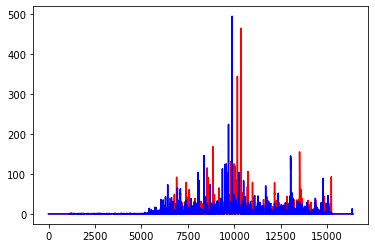

CORRELATING 0 vs -2 Shift: -477.38590559822114
saved 15July2021_G140L_interim_FP_shifts_NOdrift.txt
800 FUVB no data to shift
464.0 454.0


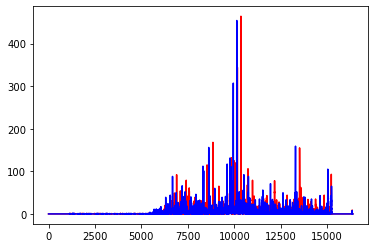

CORRELATING 0 vs -1 Shift: -221.48460753705876
saved 15July2021_G140L_interim_FP_shifts_NOdrift.txt
800 FUVB no data to shift
464.0 514.0


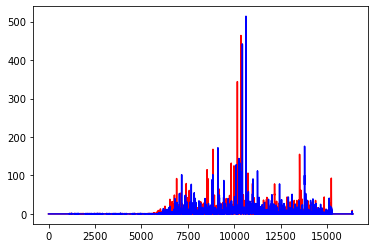

CORRELATING 0 vs 1 Shift: 269.85792632519406
saved 15July2021_G140L_interim_FP_shifts_NOdrift.txt
800 FUVB no data to shift
1055
1096
1105
1222
1230
1280
1291
1300
1309
1318
1327
1577
1589
1600
1611
1623
800
1055
1096
1105
1222
1230
1280
1291
172.0 200.0


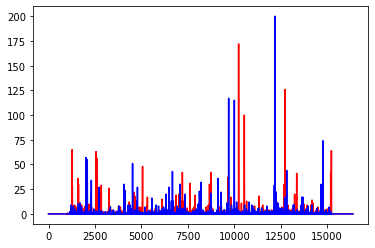

CORRELATING 0 vs -2 Shift: -536.843676900593
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
216.0 156.0


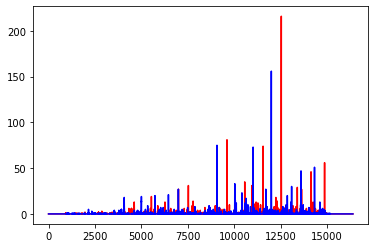

CORRELATING 0 vs -2 Shift: -537.6912793106094


saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
172.0 169.0


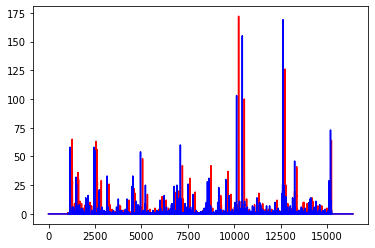

CORRELATING 0 vs -1 Shift: -108.7063086050548
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
216.0 175.0


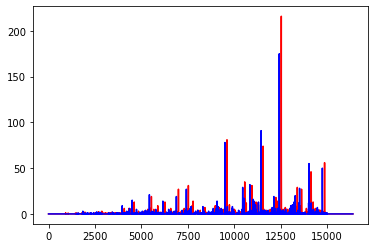

CORRELATING 0 vs -1 Shift: -108.8563913240796


saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
172.0 192.0


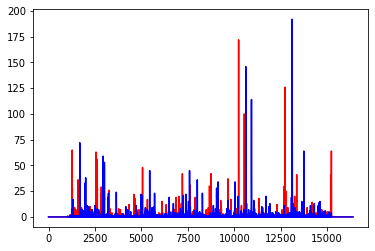

CORRELATING 0 vs 1 Shift: 385.1421781443678
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
216.0 196.0


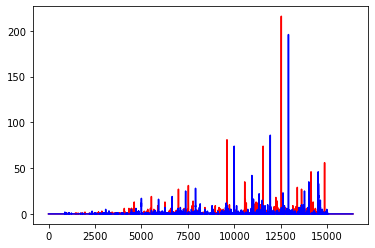

CORRELATING 0 vs 1 Shift: 385.71875926967004


saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
1300
174.0 163.0


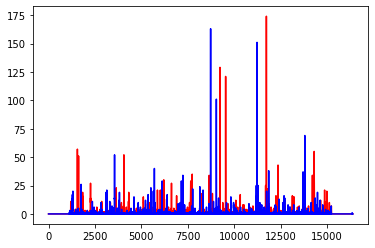

CORRELATING 0 vs -2 Shift: -503.2507206261507
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
188.0 209.0


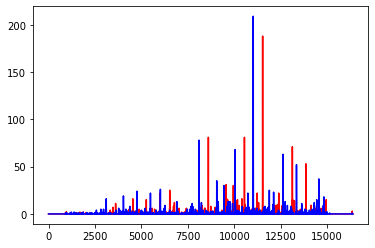

CORRELATING 0 vs -2 Shift: -504.20145213396245
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
174.0 206.0


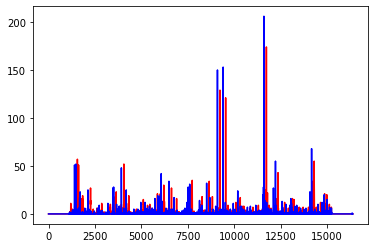

CORRELATING 0 vs -1 Shift: -135.34787760816835
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
188.0 173.0


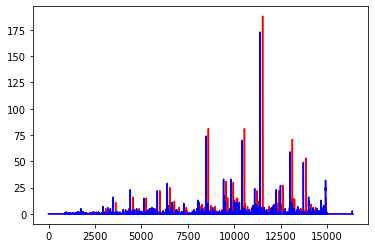

CORRELATING 0 vs -1 Shift: -135.6106532687554
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
174.0 195.0


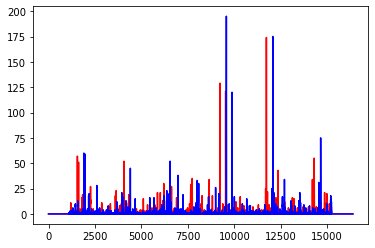

CORRELATING 0 vs 1 Shift: 345.74049873694094
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
188.0 170.0


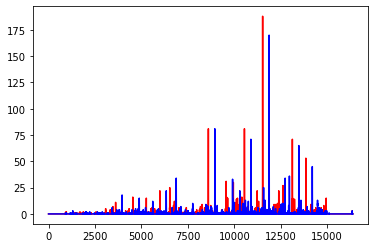

CORRELATING 0 vs 1 Shift: 347.8709848521921
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
1309
160.0 192.0


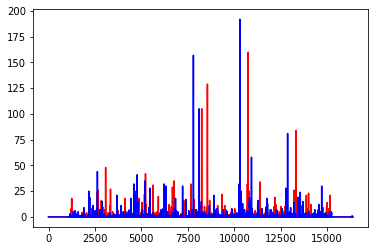

CORRELATING 0 vs -2 Shift: -445.07085424304023
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
229.0 190.0


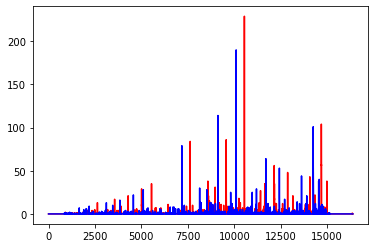

CORRELATING 0 vs -2 Shift: -443.9531703623652
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
160.0 212.0


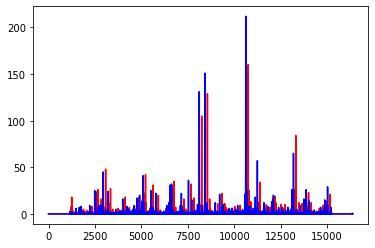

CORRELATING 0 vs -1 Shift: -128.90133213152149
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
229.0 178.0


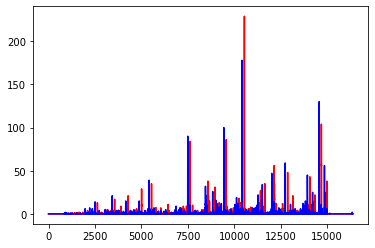

CORRELATING 0 vs -1 Shift: -128.74841179932264
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
160.0 197.0


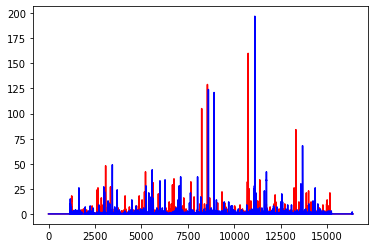

CORRELATING 0 vs 1 Shift: 360.3041825571181
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
229.0 176.0


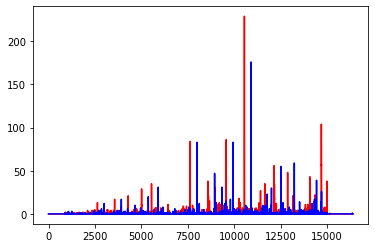

CORRELATING 0 vs 1 Shift: 360.774434644336
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
1318
212.0 225.0


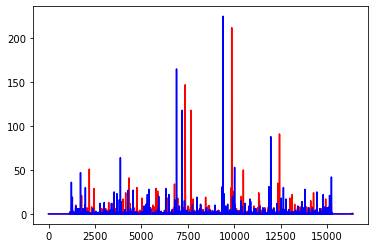

CORRELATING 0 vs -2 Shift: -469.4211196011129
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
217.0 213.0


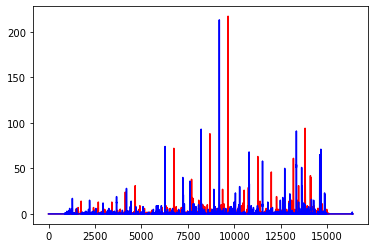

CORRELATING 0 vs -2 Shift: -470.9636960414209
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
212.0 197.0


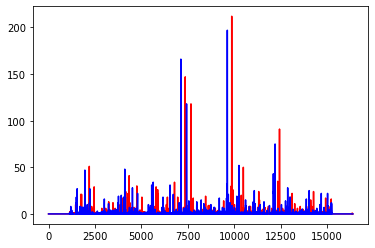

CORRELATING 0 vs -1 Shift: -237.06833461552378
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
217.0 168.0


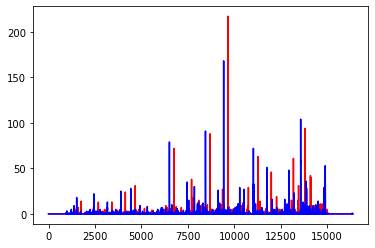

CORRELATING 0 vs -1 Shift: -237.77776348930274
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
212.0 177.0


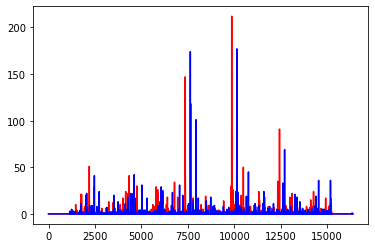

CORRELATING 0 vs 1 Shift: 273.7736465267917
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
217.0 194.0


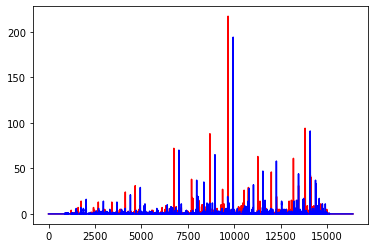

CORRELATING 0 vs 1 Shift: 274.308415095029
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
1327
192.0 180.0


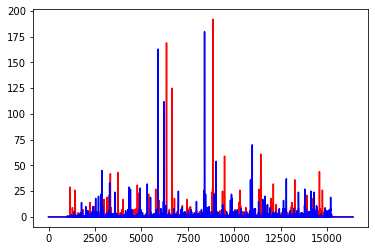

CORRELATING 0 vs -2 Shift: -453.3435460842629
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
246.0 209.0


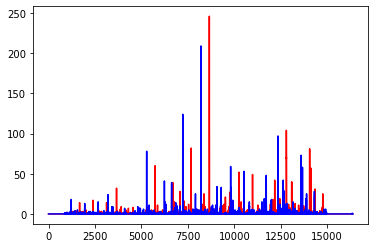

CORRELATING 0 vs -2 Shift: -453.6940449420508
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
192.0 243.0


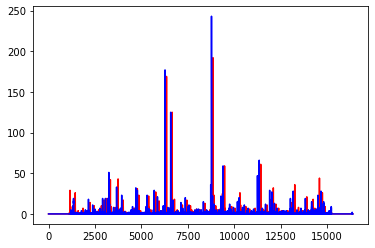

CORRELATING 0 vs -1 Shift: -80.17123723234909
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
246.0 217.0


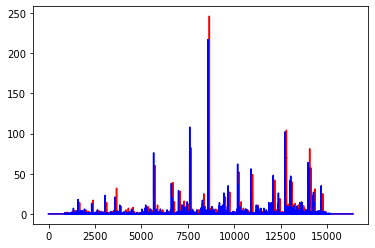

CORRELATING 0 vs -1 Shift: -80.05113392656494
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
192.0 171.0


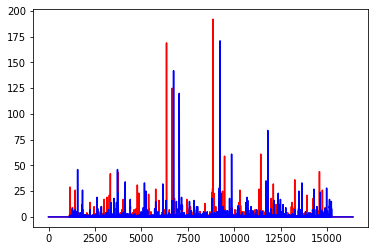

CORRELATING 0 vs 1 Shift: 381.73196447835653
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
246.0 199.0


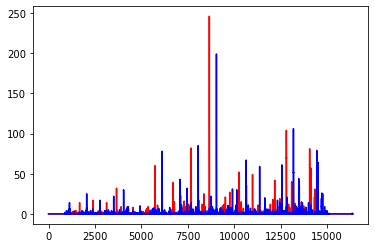

CORRELATING 0 vs 1 Shift: 381.9665675135275
saved 15July2021_G130M_interim_FP_shifts_NOdrift.txt
1533
1577
1589
1600
1611
1623
800 -2 FUVA -477.38590559822114


800 -1 FUVA -221.48460753705876
800 1 FUVA 269.85792632519406
1291 -2 FUVA -536.843676900593
1291 -2 FUVB -537.6912793106094
1291 -1 FUVA -108.7063086050548
1291 -1 FUVB -108.8563913240796
1291 1 FUVA 385.1421781443678
1291 1 FUVB 385.71875926967004
1300 -2 FUVA -503.2507206261507
1300 -2 FUVB -504.20145213396245
1300 -1 FUVA -135.34787760816835
1300 -1 FUVB -135.6106532687554
1300 1 FUVA 345.74049873694094
1300 1 FUVB 347.8709848521921
1309 -2 FUVA -445.07085424304023
1309 -2 FUVB -443.9531703623652
1309 -1 FUVA -128.90133213152149
1309 -1 FUVB -128.74841179932264
1309 1 FUVA 360.3041825571181
1309 1 FUVB 360.774434644336
1318 -2 FUVA -469.4211196011129
1318 -2 FUVB -470.9636960414209
1318 -1 FUVA -237.06833461552378
1318 -1 FUVB -237.77776348930274
1318 1 FUVA 273.7736465267917
1318 1 FUVB 274.308415095029
1327 -2 FUVA -453.3435460842629
1327 -2 FUVB -453.6940449420508
1327 -1 FUVA -80.17123723234909
1327 -1 FUVB -80.05113392656494
1327 1 FUVA 381.73196447835653
1327 1 FUVB 381.96656

In [11]:
# 11

# Define a name for a .txt save file.

save_file_G140L = '15July2021_G140L_interim_FP_shifts_NOdrift.txt'
find_fp_pix_shift(newlamptab_G140L, save_file_G140L, 3)

save_file_G130M = '15July2021_G130M_interim_FP_shifts_NOdrift.txt'
find_fp_pix_shift(newlamptab_G130M, save_file_G130M, 5)

# This routine is in the "make_interim_lamptab" routine.
# Saves new pixel shifts into .txt file, then we'll update the Lamp Tab file one more time
# to update those positions.

update_lamptab(save_file_G140L, newlamptab_G140L)

update_lamptab(save_file_G130M, newlamptab_G130M)


In [12]:
# 12

# Run a fitsdiff to see if the last Cell did what you wanted:

#!fitsdiff lampdataLP4 newlamptab_G140L
#!fitsdiff lampdataLP4 newlamptab_G130M

# Next up is to run CalCOS again!

# Changing WAVECORR to PERFORM, but everything else is the same
# from when we did this earlier.
# But also at the end, specify the new interim lamp tab file.
# Also, note that we're not changing the extract tab,
# we're using the LP3 extract tab which for cenwave 800
# has the 1105 entries.
# And we're not changing the disptab.
# Currently using LP3 disptab which has the LP4 disptab entries for c800.
#
# What is extract tab?
# has extraction region used for boxcar extraction
# rows for every grating/cenwave, segment, and aperture
# for a cenwave 800 extract tab,
# rows for all the various parameters,
# where is the spectrum landing on the detector?
# also things like slope of extraction region
# check out detector training for more details

for myfile in rawtags:
    if fits.getval(myfile, 'OPT_ELEM') == 'G140L':
        fits.setval(myfile, 'WAVECORR', value='PERFORM')
        fits.setval(myfile, 'LAMPTAB', value='15July2021_G140L_interim_lamp.fits')
    elif fits.getval(myfile, 'OPT_ELEM') == 'G130M':
        fits.setval(myfile, 'WAVECORR', value='PERFORM')
        fits.setval(myfile, 'LAMPTAB', value='15July2021_G130M_interim_lamp.fits')
        
# Because I'm setting the same set of files to calibrate, because I'm setting the
# lamptab here, it changes the default for if/when I try to run this again
# from the start.


In [13]:
# 13

# We're running CalCOS again, so let's make a new directory to put the output.
#
# And here we're just grabbing all the G140L rawtags (they're only Segment A).

rawtags_G140L = []
for myfile in rawtags:
    if fits.getval(myfile, 'OPT_ELEM') == 'G140L' and fits.getval(myfile, 'EXPTIME', ext=1) < 1000.:
        rawtags_G140L.append(myfile)
        
#print(rawtags_G140L)
        
#for myfile in rawtags_G140L:
#    calcos.calcos(myfile, outdir='/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G140L')

# ^ Comment out running CalCOS again in case I re-run the cell, since it takes forever.


In [14]:
# 14

# We're running CalCOS again, so let's make a new directory to put the output.
#
# And here we're just grabbing all the G130M rawtags (they're both Segment A & B).

rawtags_G130M = []
roots_G130M = []
for myfile in glob.glob('*rawtag*'):
    if fits.getval(myfile, 'OPT_ELEM') == 'G130M' and fits.getval(myfile, 'EXPTIME', ext=1) < 1000. and fits.getval(myfile, 'ROOTNAME').lower() not in roots_G130M:
        rawtags_G130M.append(myfile)
        roots_G130M.append(fits.getval(myfile, 'ROOTNAME').lower())
        
#rawtags_G130M = []
#for myfile in rawtags:
#    if fits.getval(myfile, 'OPT_ELEM') == 'G130M' and fits.getval(myfile, 'EXPTIME', ext=1) < 1000.:
#        rawtags_G130M.append(myfile)

#print(rawtags_G130M)        
        
#for myfile in rawtags_G130M:
#    calcos.calcos(myfile, outdir='/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M')

# ^ Comment out running CalCOS again in case I re-run the cell, since it takes forever.


In [15]:
# 15

# We're now looking at the python routine called
# "removedriftfromwavecorr.py"
# and Elaine is explaining what it does:
#
# First, set up where everything's going to go.

corrdir_G140L = '/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G140L'
outputdir_G140L = '/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G140L/corrtags_deshifted'
calcosout_G140L = '/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G140L/x1ds_deshifted'

import os
from removedriftfromwavecorr import *

lffiles_G140L = glob.glob(os.path.join(corrdir_G140L, '*lampflash.fits'))

# Copy+Paste from Camellia's code:

for lampflash in lffiles_G140L:
        
# open the lampflash file and grab the data and header
    with fits.open(lampflash) as df:
        lampdata = df[1].data
        lamphead = df[0].header

    cenwave = lamphead['cenwave']
    fppos = lamphead['fppos']

        # open the lamptab file and grab the data
        # this should be the interim lamptab file
    lamptab = '15July2021_G140L_interim_lamp.fits'#HERE
    with fits.open(lamptab) as lt:
        ltdata = lt[1].data

    for segment in ['FUVA', 'FUVB']:
        if (cenwave == 800) & (segment == 'FUVB'):
            continue

        shifts = lampdata[np.where(lampdata['segment'] == segment)]['SHIFT_DISP']

        wh_lt = np.where((ltdata['segment'] == segment) &
                         (ltdata['cenwave'] == cenwave) &
                         (ltdata['fpoffset'] == fppos-3) )
        fp_pixel_shift = ltdata[wh_lt]['fp_pixel_shift'][0]

        subshifts = shifts - fp_pixel_shift
        finalshifts = np.array([x - subshifts[0] for x in subshifts[1:]])

        print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
        print('shifts found for {} {} {} = {}'.format(cenwave, fppos, segment, finalshifts))

        # if any shifts are greater than 1 pixel, remove the drift

        # if np.any(abs(finalshifts) > 1.0):

        print('correcting xcorr....')
        info, xcorr, ycorr, time = get_corrtag_info(corrdir_G140L, lampflash, segment)

        # blocks are in the format [time_on, time_off] for a single setting from the lampflash
        blocks = make_time_blocks_sec(lampflash, info)
        print(blocks)

        newxcorr = correct_xcorr_drift(time, xcorr, blocks, finalshifts)
        newcorrtagfile = write_new_corrtag(corrdir_G140L, lampflash, newxcorr, outputdir_G140L, segment)

        # else:
        #     print('no correction done')
        #     oldcorrtagfile = get_corrtag_filename(datadir, lampflash, segment)
        #     copy_xfull(oldcorrtagfile, outputdir)

newcorrtags_G140L = glob.glob(os.path.join(outputdir_G140L, '*corrtag*'))

for newcorrtag_G140L in newcorrtags_G140L:
    fits.setval(newcorrtag_G140L, 'WAVECORR', value='OMIT')

newcorrfilesa_G140L = [x for x in newcorrtags_G140L if 'corrtag_b' not in x]

for newcorrtaga_G140L in newcorrfilesa_G140L:
    make_new_x1ds(newcorrtaga_G140L, calcosout_G140L)
                    
# (Get error below because I'm trying to re-run CalCOS on data
# that's already been CalCOSed.)


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
shifts found for 800 3 FUVA = [-0.15319428 -0.19514513 -0.18789178 -0.23382387 -0.10114191 -0.04099683
 -0.02766658]
correcting xcorr....
[[0, 60.79200000166893], [60.79200000166893, 121.79200000166894], [121.79200000166894, 180.79200000166895], [180.79200000166895, 241.79200000166895], [241.79200000166895, 300.79200000166895], [300.79200000166895, 360.79200000166895], [360.79200000166895, 420.79200000166895], [420.79200000166895, 449.92400000000004]]
EXPTIME is wrong 449.92400000000004. Changing it to: 450.0159912109375
80279 80279 80279
wrote new corrtag /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G140L/corrtags_deshifted/leih03ioq_corrtag_a.fits


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
shifts found for 800 1 FUVA = [-0.23391724 -0.563385   -0.64334106 -0.78237915 -0.9427185  -0.8831787
 -0.8803406 ]
correcting xcorr....
[[0, 60.65600001215935], [60.65600001215935, 121.65600001215935], [121.65600001215935, 180.65600001215935], [180.65600001215935, 241.65600001215935], [241.65600001215935, 300.6560000121594], [300.6560000121594, 360.6560000121594], [360.6560000121594, 420.6560000121594], [420.6560000121594, 449.86]]
EXPTIME is wrong 449.86. Changing it to: 450.0159912109375
87056 87056 87056
wrote new corrtag /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G140L/corrtags_deshifted/leih03iiq_corrtag_a.fits
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
shifts found for 800 4 FUVA = [ 0.09152222 -0.09262085  0.09326172 -0.13702393 -0.08911133 -0.02441406
  0.05490112]
correcting xcorr....
[[0, 60.75199999809266], [60.75199999809266, 121.75199999809266], [121.75199999809266, 180.75199999809266], [18

Spectrum will be extracted at y = 564.95
End   16-Jul-2021 14:49:07 EDT
CALCOS version 3.3.10
numpy version 1.19.2
astropy version 4.2.1
Begin 16-Jul-2021 14:49:07 EDT
Input file = /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G140L/corrtags_deshifted/leih03iiq_corrtag_a.fits
    EXPTYPE will be changed to EXTERNAL/CAL.

TIME-TAG calibration -- 16-Jul-2021 14:49:07 EDT
Input     /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G140L/corrtags_deshifted/leih03iiq_corrtag_a.fits
OutTag    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G140L/x1ds_deshifted/leih03iiq_corrtag_a.fits
OutFlt    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G140L/x1ds_deshifted/leih03iiq_flt_a.fits
OutCounts /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G140L/x1ds_deshifted/leih03iiq_counts_a.fits
OutFlash  /Users/ahirschau

In [16]:
# 16

# We're now looking at the python routine called
# "removedriftfromwavecorr.py"
# and Elaine is explaining what it does:
#
# First, set up where everything's going to go.

corrdir_G130M = '/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M'
outputdir_G130M = '/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/corrtags_deshifted'
calcosout_G130M = '/Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted'

import os
from removedriftfromwavecorr import *

lffiles_G130M = glob.glob(os.path.join(corrdir_G130M, '*lampflash.fits'))

# Copy+Paste from Camellia's code:

for lampflash in lffiles_G130M:
        
# open the lampflash file and grab the data and header
    with fits.open(lampflash) as df:
        lampdata = df[1].data
        lamphead = df[0].header

    cenwave = lamphead['cenwave']
    fppos = lamphead['fppos']

        # open the lamptab file and grab the data
        # this should be the interim lamptab file
    lamptab = '15July2021_G130M_interim_lamp.fits'#HERE
    with fits.open(lamptab) as lt:
        ltdata = lt[1].data

    for segment in ['FUVA', 'FUVB']:
        if (cenwave == 800) & (segment == 'FUVB'):
            continue

        shifts = lampdata[np.where(lampdata['segment'] == segment)]['SHIFT_DISP']

        wh_lt = np.where((ltdata['segment'] == segment) &
                         (ltdata['cenwave'] == cenwave) &
                         (ltdata['fpoffset'] == fppos-3) )
        fp_pixel_shift = ltdata[wh_lt]['fp_pixel_shift'][0]

        subshifts = shifts - fp_pixel_shift
        finalshifts = np.array([x - subshifts[0] for x in subshifts[1:]])

        print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
        print('shifts found for {} {} {} = {}'.format(cenwave, fppos, segment, finalshifts))

        # if any shifts are greater than 1 pixel, remove the drift

        # if np.any(abs(finalshifts) > 1.0):

        print('correcting xcorr....')
        info, xcorr, ycorr, time = get_corrtag_info(corrdir_G130M, lampflash, segment)

        # blocks are in the format [time_on, time_off] for a single setting from the lampflash
        blocks = make_time_blocks_sec(lampflash, info)
        print(blocks)

        newxcorr = correct_xcorr_drift(time, xcorr, blocks, finalshifts)
        newcorrtagfile = write_new_corrtag(corrdir_G130M, lampflash, newxcorr, outputdir_G130M, segment)

        # else:
        #     print('no correction done')
        #     oldcorrtagfile = get_corrtag_filename(datadir, lampflash, segment)
        #     copy_xfull(oldcorrtagfile, outputdir)

newcorrtags_G130M = glob.glob(os.path.join(outputdir_G130M, '*corrtag*'))

for newcorrtag_G130M in newcorrtags_G130M:
    fits.setval(newcorrtag_G130M, 'WAVECORR', value='OMIT')

newcorrfilesa_G130M = [x for x in newcorrtags_G130M if 'corrtag_b' not in x]

for newcorrtaga_G130M in newcorrfilesa_G130M:
    make_new_x1ds(newcorrtaga_G130M, calcosout_G130M)
                    
# (Get error below because I'm trying to re-run CalCOS on data
# that's already been CalCOSed.)


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
shifts found for 1327 3 FUVA = [-0.36249986 -0.5487147  -0.62632954]
correcting xcorr....
[[0, 60.63200000151992], [60.63200000151992, 120.63200000151993], [120.63200000151993, 180.63200000151994], [180.63200000151994, 210.084]]
14737 14737 14737
wrote new corrtag /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/corrtags_deshifted/leih02cfq_corrtag_a.fits
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
shifts found for 1327 3 FUVB = [-0.39840704 -0.6007111  -0.65298325]
correcting xcorr....
[[0, 60.66400000303984], [60.66400000303984, 120.66400000303985], [120.66400000303985, 180.66400000303986], [180.66400000303986, 210.084]]
14126 14126 14126
wrote new corrtag /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/corrtags_deshifted/leih02cfq_corrtag_b.fits
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
shifts found for 1318 3 FUVA = [-0.2381646  -0.32686913 -0.44123703]
corre

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
shifts found for 1327 4 FUVA = [0.14529419 0.05596924 0.15231323]
correcting xcorr....
[[0, 60.49600000083447], [60.49600000083447, 120.49600000083447], [120.49600000083447, 180.49600000083447], [180.49600000083447, 210.052]]
15032 15032 15032
wrote new corrtag /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/corrtags_deshifted/leih02chq_corrtag_a.fits
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
shifts found for 1327 4 FUVB = [0.01000977 0.01412964 0.10736084]
correcting xcorr....
[[0, 60.66400000303984], [60.66400000303984, 120.66400000303985], [120.66400000303985, 180.66400000303986], [180.66400000303986, 210.052]]
14216 14216 14216
wrote new corrtag /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/corrtags_deshifted/leih02chq_corrtag_b.fits
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
shifts found for 1291 2 FUVA = [0.06912231 0.21711731 0.23808289]
correcting xco

wrote new corrtag /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/corrtags_deshifted/leih01g8q_corrtag_a.fits
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
shifts found for 1300 4 FUVB = [-0.2013855  -0.32461548 -0.04733276]
correcting xcorr....
[[0, 60.52800000607968], [60.52800000607968, 120.52800000607968], [120.52800000607968, 180.52800000607968], [180.52800000607968, 209.988]]
EXPTIME is wrong 209.988. Changing it to: 210.01600646972656
10617 10617 10617
wrote new corrtag /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/corrtags_deshifted/leih01g8q_corrtag_b.fits
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
shifts found for 1309 2 FUVA = [-0.17329407 -0.32955933 -0.35913086]
correcting xcorr....
[[0, 60.512000024318695], [60.512000024318695, 120.5120000243187], [120.5120000243187, 180.5120000243187], [180.5120000243187, 209.668]]
EXPTIME is wrong 209.668. Changing it to: 210.01600646972656
13795 13795 13

    EXPTYPE will be changed to EXTERNAL/CAL.

TIME-TAG calibration -- 16-Jul-2021 14:51:35 EDT
Input     /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/corrtags_deshifted/leih01f6q_corrtag_a.fits
OutTag    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01f6q_corrtag_a.fits
OutFlt    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01f6q_flt_a.fits
OutCounts /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01f6q_counts_a.fits
OutFlash  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01f6q_lampflash_a.fits
DETECTOR  FUV, segment A
EXPTYPE   EXTERNAL/CAL
OPT_ELEM  G130M, CENWAVE 1291, FPOFFSET 0
APERTURE  WCA

BADTCORR  OMIT
RANDCORR  OMIT (already complete)
TEMPCORR  OMIT (already complete)
GEOCORR   O

Extraction algorithm = BOXCAR
XTRACTAB= /grp/hst/cos2/LP5_ERA/files_to_use/lp5_1dx_070721.fits
DISPTAB = lref$xaa18189l_disp.fits
HELCORR   OMIT
BACKCORR  OMIT
STATFLAG  T
FLUXCORR  OMIT
FUVA spectrum was found at y = 647.29 vs. nominal y = 647.64
    error estimate for y location = 8.34, FWHM = 5.65
Spectrum will be extracted at y = 647.64

TIME-TAG calibration -- 16-Jul-2021 14:52:18 EDT
Input     /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/corrtags_deshifted/leih01g8q_corrtag_b.fits
OutTag    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01g8q_corrtag_b.fits
OutFlt    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01g8q_flt_b.fits
OutCounts /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01g8q_counts_b.fits
OutFlash  /Users/ahirschauer/Documents/Year4


Info:  find-target option = no
X1DCORR   PERFORM
Extraction algorithm = BOXCAR
XTRACTAB= /grp/hst/cos2/LP5_ERA/files_to_use/lp5_1dx_070721.fits
DISPTAB = lref$xaa18189l_disp.fits
HELCORR   OMIT
BACKCORR  OMIT
STATFLAG  T
FLUXCORR  OMIT
FUVB spectrum was found at y = 706.79 vs. nominal y = 706.91
    error estimate for y location = 3.95, FWHM = 5.35
Spectrum will be extracted at y = 706.91
End   16-Jul-2021 14:53:04 EDT
CALCOS version 3.3.10
numpy version 1.19.2
astropy version 4.2.1
Begin 16-Jul-2021 14:53:04 EDT
Input file = /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/corrtags_deshifted/leih01ezq_corrtag_a.fits
    EXPTYPE will be changed to EXTERNAL/CAL.
    EXPTYPE will be changed to EXTERNAL/CAL.

TIME-TAG calibration -- 16-Jul-2021 14:53:04 EDT
Input     /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/corrtags_deshifted/leih01ezq_corrtag_a.fits
OutTag    /Users/ahirschauer/Documents/Year4/04

TEMPCORR  OMIT (already complete)
GEOCORR   OMIT (already complete)
DGEOCORR  OMIT
DEADCORR  OMIT (already complete)
PHACORR   OMIT (already complete)
DOPPCORR  OMIT
FLATCORR  OMIT (already complete)
WAVECORR  OMIT
BRSTCORR  OMIT
TRCECORR  OMIT
ALGNCORR  OMIT
DQICORR   PERFORM (complete, but repeat)
BPIXTAB = lref$36d1836ml_bpix.fits
GSAGTAB = lref$54c1542dl_gsag.fits
SPOTTAB = lref$zas1615jl_spot.fits
Shifting to 0, -1
STATFLAG  T
Update the TIMELINE extension.

Spectral Extraction -- 16-Jul-2021 14:53:49 EDT
Input     /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih02bdq_flt_a.fits
Incounts  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih02bdq_counts_a.fits
Output    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih02bdq_x1d_a.fits

Info:  find-target option = no
X1DCORR   PERFORM
Extraction algorithm

DETECTOR  FUV, segment B
EXPTYPE   EXTERNAL/CAL
OPT_ELEM  G130M, CENWAVE 1291, FPOFFSET 1
APERTURE  WCA

BADTCORR  OMIT
RANDCORR  OMIT (already complete)
TEMPCORR  OMIT (already complete)
GEOCORR   OMIT (already complete)
DGEOCORR  OMIT
DEADCORR  OMIT (already complete)
PHACORR   OMIT (already complete)
DOPPCORR  OMIT
FLATCORR  OMIT (already complete)
WAVECORR  OMIT
BRSTCORR  OMIT
TRCECORR  OMIT
ALGNCORR  OMIT
DQICORR   PERFORM (complete, but repeat)
BPIXTAB = lref$36d1836ml_bpix.fits
GSAGTAB = lref$54c1542dl_gsag.fits
SPOTTAB = lref$zas1615jl_spot.fits
Shifting to 0, -2
STATFLAG  T
Update the TIMELINE extension.

Spectral Extraction -- 16-Jul-2021 14:54:35 EDT
Input     /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01fbq_flt_b.fits
Incounts  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01fbq_counts_b.fits
Output    /Users/ahirschauer/Documents/Year4/04-2021/

    EXPTYPE will be changed to EXTERNAL/CAL.
    EXPTYPE will be changed to EXTERNAL/CAL.

TIME-TAG calibration -- 16-Jul-2021 14:55:06 EDT
Input     /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/corrtags_deshifted/leih02c0q_corrtag_a.fits
OutTag    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih02c0q_corrtag_a.fits
OutFlt    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih02c0q_flt_a.fits
OutCounts /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih02c0q_counts_a.fits
OutFlash  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih02c0q_lampflash_a.fits
DETECTOR  FUV, segment A
EXPTYPE   EXTERNAL/CAL
OPT_ELEM  G130M, CENWAVE 1318, FPOFFSET -2
APERTURE  WCA

BADTCORR  OMIT
RANDCORR  OMIT (already complete)


Info:  find-target option = no
X1DCORR   PERFORM
Extraction algorithm = BOXCAR
XTRACTAB= /grp/hst/cos2/LP5_ERA/files_to_use/lp5_1dx_070721.fits
DISPTAB = lref$xaa18189l_disp.fits
HELCORR   OMIT
BACKCORR  OMIT
STATFLAG  T
FLUXCORR  OMIT
FUVA spectrum was found at y = 645.44 vs. nominal y = 645.61
    error estimate for y location = 12.39, FWHM = 5.11
Spectrum will be extracted at y = 645.61

TIME-TAG calibration -- 16-Jul-2021 14:55:51 EDT
Input     /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/corrtags_deshifted/leih02c8q_corrtag_b.fits
OutTag    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih02c8q_corrtag_b.fits
OutFlt    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih02c8q_flt_b.fits
OutCounts /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih02c8q_counts_

Incounts  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih02bfq_counts_b.fits
Output    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih02bfq_x1d_b.fits

Info:  find-target option = no
X1DCORR   PERFORM
Extraction algorithm = BOXCAR
XTRACTAB= /grp/hst/cos2/LP5_ERA/files_to_use/lp5_1dx_070721.fits
DISPTAB = lref$xaa18189l_disp.fits
HELCORR   OMIT
BACKCORR  OMIT
STATFLAG  T
FLUXCORR  OMIT
FUVB spectrum was found at y = 706.75 vs. nominal y = 706.91
    error estimate for y location = 9.30, FWHM = 5.29
Spectrum will be extracted at y = 706.91
End   16-Jul-2021 14:56:36 EDT
CALCOS version 3.3.10
numpy version 1.19.2
astropy version 4.2.1
Begin 16-Jul-2021 14:56:36 EDT
Input file = /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/corrtags_deshifted/leih02c2q_corrtag_a.fits
    EXPTYPE will be changed to EXTERNAL/CAL.
    EXPTYP

DETECTOR  FUV, segment A
EXPTYPE   EXTERNAL/CAL
OPT_ELEM  G130M, CENWAVE 1300, FPOFFSET -2
APERTURE  WCA

BADTCORR  OMIT
RANDCORR  OMIT (already complete)
TEMPCORR  OMIT (already complete)
GEOCORR   OMIT (already complete)
DGEOCORR  OMIT
DEADCORR  OMIT (already complete)
PHACORR   OMIT (already complete)
DOPPCORR  OMIT
FLATCORR  OMIT (already complete)
WAVECORR  OMIT
BRSTCORR  OMIT
TRCECORR  OMIT
ALGNCORR  OMIT
DQICORR   PERFORM (complete, but repeat)
BPIXTAB = lref$36d1836ml_bpix.fits
GSAGTAB = lref$54c1542dl_gsag.fits
SPOTTAB = lref$zas1615jl_spot.fits
Shifting to 0, -1
Shifting to 0, 0
STATFLAG  T
Update the TIMELINE extension.

Spectral Extraction -- 16-Jul-2021 14:57:21 EDT
Input     /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01fzq_flt_a.fits
Incounts  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01fzq_counts_a.fits
Output    /Users/ahirschauer/Docume

OutCounts /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01gaq_counts_b.fits
OutFlash  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01gaq_lampflash_b.fits
DETECTOR  FUV, segment B
EXPTYPE   EXTERNAL/CAL
OPT_ELEM  G130M, CENWAVE 1309, FPOFFSET -2
APERTURE  WCA

BADTCORR  OMIT
RANDCORR  OMIT (already complete)
TEMPCORR  OMIT (already complete)
GEOCORR   OMIT (already complete)
DGEOCORR  OMIT
DEADCORR  OMIT (already complete)
PHACORR   OMIT (already complete)
DOPPCORR  OMIT
FLATCORR  OMIT (already complete)
WAVECORR  OMIT
BRSTCORR  OMIT
TRCECORR  OMIT
ALGNCORR  OMIT
DQICORR   PERFORM (complete, but repeat)
BPIXTAB = lref$36d1836ml_bpix.fits
GSAGTAB = lref$54c1542dl_gsag.fits
SPOTTAB = lref$zas1615jl_spot.fits
Shifting to 0, -1
STATFLAG  T
Update the TIMELINE extension.

Spectral Extraction -- 16-Jul-2021 14:58:07 EDT
Input     /Users/ahirschauer/Documents/Year4/0

Input file = /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/corrtags_deshifted/leih01g2q_corrtag_a.fits
    EXPTYPE will be changed to EXTERNAL/CAL.
    EXPTYPE will be changed to EXTERNAL/CAL.

TIME-TAG calibration -- 16-Jul-2021 14:58:37 EDT
Input     /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/corrtags_deshifted/leih01g2q_corrtag_a.fits
OutTag    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01g2q_corrtag_a.fits
OutFlt    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01g2q_flt_a.fits
OutCounts /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01g2q_counts_a.fits
OutFlash  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01g2q_lampflash_a.fits
DETECT

Incounts  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih02cfq_counts_a.fits
Output    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih02cfq_x1d_a.fits

Info:  find-target option = no
X1DCORR   PERFORM
Extraction algorithm = BOXCAR
XTRACTAB= /grp/hst/cos2/LP5_ERA/files_to_use/lp5_1dx_070721.fits
DISPTAB = lref$xaa18189l_disp.fits
HELCORR   OMIT
BACKCORR  OMIT
STATFLAG  T
FLUXCORR  OMIT
FUVA spectrum was found at y = 645.48 vs. nominal y = 645.61
    error estimate for y location = 7.82, FWHM = 4.49
Spectrum will be extracted at y = 645.61

TIME-TAG calibration -- 16-Jul-2021 14:59:22 EDT
Input     /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/corrtags_deshifted/leih02cfq_corrtag_b.fits
OutTag    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih02cfq_corrtag_b

Update the TIMELINE extension.

Spectral Extraction -- 16-Jul-2021 15:00:04 EDT
Input     /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih02c4q_flt_b.fits
Incounts  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih02c4q_counts_b.fits
Output    /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih02c4q_x1d_b.fits

Info:  find-target option = no
X1DCORR   PERFORM
Extraction algorithm = BOXCAR
XTRACTAB= /grp/hst/cos2/LP5_ERA/files_to_use/lp5_1dx_070721.fits
DISPTAB = lref$xaa18189l_disp.fits
HELCORR   OMIT
BACKCORR  OMIT
STATFLAG  T
FLUXCORR  OMIT
FUVB spectrum was found at y = 706.32 vs. nominal y = 706.28
    error estimate for y location = 6.66, FWHM = 4.90
Spectrum will be extracted at y = 706.28
End   16-Jul-2021 15:00:06 EDT
CALCOS version 3.3.10
numpy version 1.19.2
astropy version 4.2.1
Begin 16-Jul-2021

OutCounts /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01g5q_counts_a.fits
OutFlash  /Users/ahirschauer/Documents/Year4/04-2021/Lamp_Tabs/ahirscha58916/output_15July2021/G130M/x1ds_deshifted/leih01g5q_lampflash_a.fits
DETECTOR  FUV, segment A
EXPTYPE   EXTERNAL/CAL
OPT_ELEM  G130M, CENWAVE 1300, FPOFFSET 0
APERTURE  WCA

BADTCORR  OMIT
RANDCORR  OMIT (already complete)
TEMPCORR  OMIT (already complete)
GEOCORR   OMIT (already complete)
DGEOCORR  OMIT
DEADCORR  OMIT (already complete)
PHACORR   OMIT (already complete)
DOPPCORR  OMIT
FLATCORR  OMIT (already complete)
WAVECORR  OMIT
BRSTCORR  OMIT
TRCECORR  OMIT
ALGNCORR  OMIT
DQICORR   PERFORM (complete, but repeat)
BPIXTAB = lref$36d1836ml_bpix.fits
GSAGTAB = lref$54c1542dl_gsag.fits
SPOTTAB = lref$zas1615jl_spot.fits
Shifting to 0, -1
Shifting to 0, 0
STATFLAG  T
Update the TIMELINE extension.

Spectral Extraction -- 16-Jul-2021 15:00:52 EDT
Input     /Users/ahirschauer/D

In [17]:
# 17

from updating_newcenwave_lamptab import *


In [20]:
# 18

import shutil

# First step, glob all the appropriate x1d files from the calcosout directory.
# These are the de-shifted x1d files.

x1dfiles_G140L = glob.glob(os.path.join(calcosout_G140L, '*_x1d.fits'))

# Copy+pasting relevant bits form Camellia's code...

new_lamp_name_G140L = "LP3_G140L_fuv_15July2021_lamp.fits"
#old_lamp_name = lampdataLP3
# ^ this is redundant

makelamptemplatefile(new_lamp_name_G140L, lampdataLP3, x1dfiles_G140L)

# getting x1d data (de-shifted), writing out to intensity
# column in the lamp tab

# dispersion files establish where the zero point of the
# wavelength solution (variable in DISPTAB is "D")
#
# disp file from LP4 from before worked okay,
# so let's look it up and download it like we did before
# but we need to know the file name!
#
# NOTE: we're going to use the LP3 disptab instead, but it has
# the solutions from LP4 in it (it'll be easier for me)
# "52j2117ml_disp.fits"

new_disp_name_G140L = "LP3_G140L_fuv_15July2021_disp.fits"
old_disp_name_G140L = "52j2117ml_disp.fits"

save_file_G140L = "LP3_G140L_final_FP_shifts_15July2021.txt"

find_fp_pix_shift(new_lamp_name_G140L, save_file_G140L, 3)

# getting pixel shift value and writing it out to text file

update_lamptab(save_file_G140L, new_lamp_name_G140L)

# ^ this actually writes it out to the file
#
# Copy+Pasting now directly from Camellia's code:

# Updating DISPTAB
# copying the old disptab so the linear dispersion values match when the
# LP1 lamptab was created.

if os.path.exists(new_disp_name_G140L):
    y_n = input('Do you want to overwrite {}? y/n '.format(new_disp_name_G140L))
    if y_n == 'y':
        os.remove(new_disp_name_G140L)
        shutil.copy(old_disp_name_G140L, new_disp_name_G140L)
    else:
        raise ValueError("Exiting. Change DISPTAB name.")
else:
    shutil.copy(old_disp_name_G140L, new_disp_name_G140L)

update_zeropoint(new_lamp_name_G140L, lampdataLP3, new_disp_name_G140L, old_disp_name_G140L, 3)


G140L 800 -1 449.92
G140L 800 0 449.824
G140L 800 1 449.664
G140L 800 -2 449.76
800
CORRELATING 0 vs -2 Shift: -476.9184956007084
saved LP3_G140L_final_FP_shifts_15July2021.txt


800 FUVB no data to shift
CORRELATING 0 vs -1 Shift: -221.73764950424084
saved LP3_G140L_final_FP_shifts_15July2021.txt
800 FUVB no data to shift
CORRELATING 0 vs 1 Shift: 269.75902599040273
saved LP3_G140L_final_FP_shifts_15July2021.txt
800 FUVB no data to shift
1055
1096
1105
1222
1230
1280
1291
1300
1309
1318
1327
1577
1589
1600
1611
1623
800 -2 FUVA -476.9184956007084
800 -1 FUVA -221.73764950424084
800 1 FUVA 269.75902599040273
Do you want to overwrite LP3_G140L_fuv_15July2021_disp.fits? y/n y
Updating DISPTAB
Updating 800/FUVA: 0.0 to 4086.135009765625 
 Difference of: 4086.1350705497425


In [21]:
# 19

import shutil

# First step, glob all the appropriate x1d files from the calcosout directory.
# These are the de-shifted x1d files.

x1dfiles_G130M = glob.glob(os.path.join(calcosout_G130M, '*_x1d.fits'))

# Copy+pasting relevant bits form Camellia's code...

new_lamp_name_G130M = "LP5_G130M_fuv_15July2021_lamp.fits"
#old_lamp_name = lampdataLP4
# ^ this is redundant

makelamptemplatefile(new_lamp_name_G130M, lampdataLP4, x1dfiles_G130M)

# getting x1d data (de-shifted), writing out to intensity
# column in the lamp tab

# dispersion files establish where the zero point of the
# wavelength solution (variable in DISPTAB is "D")
#
# disp file from LP4 from before worked okay,
# so let's look it up and download it like we did before
# but we need to know the file name!
#
# NOTE: we're going to use the LP3 disptab instead, but it has
# the solutions from LP4 in it (it'll be easier for me)
# "52j2117ml_disp.fits"

new_disp_name_G130M = "LP5_G130M_fuv_15July2021_disp.fits"
old_disp_name_G130M = "2bj2256ml_disp.fits"
#old_disp_name_G130M = "lp4_2bj2256ml_disp.fits"

save_file_G130M = "LP5_G130M_final_FP_shifts_15July2021.txt"

find_fp_pix_shift(new_lamp_name_G130M, save_file_G130M, 5)

# getting pixel shift value and writing it out to text file

update_lamptab(save_file_G130M, new_lamp_name_G130M)

# ^ this actually writes it out to the file
#
# Copy+Pasting now directly from Camellia's code:

# Updating DISPTAB
# copying the old disptab so the linear dispersion values match when the
# LP1 lamptab was created.

if os.path.exists(new_disp_name_G130M):
    y_n = input('Do you want to overwrite {}? y/n '.format(new_disp_name_G130M))
    if y_n == 'y':
        os.remove(new_disp_name_G130M)
        shutil.copy(old_disp_name_G130M, new_disp_name_G130M)
    else:
        raise ValueError("Exiting. Change DISPTAB name.")
else:
    shutil.copy(old_disp_name_G130M, new_disp_name_G130M)

update_zeropoint(new_lamp_name_G130M, lampdataLP4, new_disp_name_G130M, old_disp_name_G130M, 5)


G130M 1309 1 209.888
G130M 1327 -2 209.952
G130M 1291 -2 209.888
G130M 1309 -2 209.856
G130M 1318 -1 209.92
G130M 1300 -2 210.016
G130M 1291 1 209.952
G130M 1327 1 209.952
G130M 1318 0 209.92
G130M 1309 0 209.952
G130M 1309 -1 209.568
G130M 1291 -1 209.76
G130M 1300 -1 209.952
G130M 1291 0 209.952
G130M 1327 0 209.984
G130M 1300 0 210.016
G130M 1318 -2 209.952
G130M 1327 -1 209.888
G130M 1300 1 209.888
G130M 1318 1 209.856
800
1055
1096
1105
1222
1230
1280
1291
CORRELATING 0 vs -2 Shift: -536.7791673546453
saved LP5_G130M_final_FP_shifts_15July2021.txt
CORRELATING 0 vs -2 Shift: -537.7277536686051
saved LP5_G130M_final_FP_shifts_15July2021.txt


CORRELATING 0 vs -1 Shift: -108.9996509047196
saved LP5_G130M_final_FP_shifts_15July2021.txt
CORRELATING 0 vs -1 Shift: -109.06236339656607
saved LP5_G130M_final_FP_shifts_15July2021.txt
CORRELATING 0 vs 1 Shift: 385.0531785719086
saved LP5_G130M_final_FP_shifts_15July2021.txt


CORRELATING 0 vs 1 Shift: 385.36971948136124
saved LP5_G130M_final_FP_shifts_15July2021.txt
1300
CORRELATING 0 vs -2 Shift: -503.0917751353336
saved LP5_G130M_final_FP_shifts_15July2021.txt
CORRELATING 0 vs -2 Shift: -504.24485574146456
saved LP5_G130M_final_FP_shifts_15July2021.txt


CORRELATING 0 vs -1 Shift: -135.48911971530833
saved LP5_G130M_final_FP_shifts_15July2021.txt
CORRELATING 0 vs -1 Shift: -135.8276253844415
saved LP5_G130M_final_FP_shifts_15July2021.txt
CORRELATING 0 vs 1 Shift: 345.6573572794696
saved LP5_G130M_final_FP_shifts_15July2021.txt


CORRELATING 0 vs 1 Shift: 347.57630698299
saved LP5_G130M_final_FP_shifts_15July2021.txt
1309
CORRELATING 0 vs -2 Shift: -444.84154945058253
saved LP5_G130M_final_FP_shifts_15July2021.txt
CORRELATING 0 vs -2 Shift: -443.83367713039115


saved LP5_G130M_final_FP_shifts_15July2021.txt
CORRELATING 0 vs -1 Shift: -128.7080138972742
saved LP5_G130M_final_FP_shifts_15July2021.txt
CORRELATING 0 vs -1 Shift: -128.56012672469296
saved LP5_G130M_final_FP_shifts_15July2021.txt
CORRELATING 0 vs 1 Shift: 360.36200592240857
saved LP5_G130M_final_FP_shifts_15July2021.txt
CORRELATING 0 vs 1 Shift: 360.70802624699354
saved LP5_G130M_final_FP_shifts_15July2021.txt
1318
CORRELATING 0 vs -2 Shift: -469.40855880490926
saved LP5_G130M_final_FP_shifts_15July2021.txt


CORRELATING 0 vs -2 Shift: -470.91637647966127
saved LP5_G130M_final_FP_shifts_15July2021.txt
CORRELATING 0 vs -1 Shift: -237.09075193035824
saved LP5_G130M_final_FP_shifts_15July2021.txt
CORRELATING 0 vs -1 Shift: -237.65913073120828
saved LP5_G130M_final_FP_shifts_15July2021.txt


CORRELATING 0 vs 1 Shift: 273.6623835881983
saved LP5_G130M_final_FP_shifts_15July2021.txt
CORRELATING 0 vs 1 Shift: 274.2544197846546
saved LP5_G130M_final_FP_shifts_15July2021.txt
1327
CORRELATING 0 vs -2 Shift: -453.69273971971415
saved LP5_G130M_final_FP_shifts_15July2021.txt


CORRELATING 0 vs -2 Shift: -453.8604614325486
saved LP5_G130M_final_FP_shifts_15July2021.txt
CORRELATING 0 vs -1 Shift: -80.42451958149468
saved LP5_G130M_final_FP_shifts_15July2021.txt
CORRELATING 0 vs -1 Shift: -80.25025266978264
saved LP5_G130M_final_FP_shifts_15July2021.txt


CORRELATING 0 vs 1 Shift: 381.1690150052418
saved LP5_G130M_final_FP_shifts_15July2021.txt
CORRELATING 0 vs 1 Shift: 381.6256900531462
saved LP5_G130M_final_FP_shifts_15July2021.txt
1533
1577
1589
1600
1611
1623


1291 -2 FUVA -536.7791673546453
1291 -2 FUVB -537.7277536686051
1291 -1 FUVA -108.9996509047196
1291 -1 FUVB -109.06236339656607
1291 1 FUVA 385.0531785719086
1291 1 FUVB 385.36971948136124
1300 -2 FUVA -503.0917751353336
1300 -2 FUVB -504.24485574146456
1300 -1 FUVA -135.48911971530833
1300 -1 FUVB -135.8276253844415
1300 1 FUVA 345.6573572794696
1300 1 FUVB 347.57630698299
1309 -2 FUVA -444.84154945058253
1309 -2 FUVB -443.83367713039115
1309 -1 FUVA -128.7080138972742
1309 -1 FUVB -128.56012672469296
1309 1 FUVA 360.36200592240857
1309 1 FUVB 360.70802624699354
1318 -2 FUVA -469.40855880490926
1318 -2 FUVB -470.91637647966127
1318 -1 FUVA -237.09075193035824
1318 -1 FUVB -237.65913073120828
1318 1 FUVA 273.6623835881983
1318 1 FUVB 274.2544197846546
1327 -2 FUVA -453.69273971971415
1327 -2 FUVB -453.8604614325486
1327 -1 FUVA -80.42451958149468
1327 -1 FUVB -80.25025266978264
1327 1 FUVA 381.1690150052418
1327 1 FUVB 381.6256900531462
Updating DISPTAB
Updating 1291/FUVA: 0.0 to 56.5

In [22]:
# 20

# From the above cell we have updated DISPTAB
#
# This is the end of Elaine's checklist!
# I can do a fitsdiff to see what was updated
# My deliverables will be the new _lamp.fits files
# one each for LP3 and LP5
# and also I'll send that plus the _disp.fits file(s) to Rachel at some point
#

In [29]:
# 21

# Let's run fitsdiff a couple of times to see what the new
# _lamp.fits and _disp.fits are like compared to the old ones.

!fitsdiff "2bj2256ol_lamp.fits" "LP5_G130M_fuv_15July2021_lamp.fits"

!fitsdiff "52j2110ml_lamp.fits" "LP3_G140L_fuv_15July2021_lamp.fits"



 fitsdiff: 4.1
 a: 2bj2256ol_lamp.fits
 b: LP5_G130M_fuv_15July2021_lamp.fits
 Maximum number of different data values to be reported: 10
 Relative tolerance: 0.0, Absolute tolerance: 0.0

Primary HDU:

   Headers contain differences:
     Keyword CHECKSUM has different values:
        a> AU6RAR6RAR6RAR6R
        b> FUAUGT6SFTASFT5S
     Keyword CHECKSUM has different comments:
        a> HDU checksum updated 2018-11-19T17:56:49
         ?                         ^  ^^^^  ^ ^^ ^^
        b> HDU checksum updated 2021-07-16T15:20:01
         ?                        + ^^^  ^  ^ ^^ ^^
     Keyword DATASUM  has different comments:
        a> data unit checksum updated 2018-11-19T17:56:49
         ?                               ^  ^^^^  ^ ^^ ^^
        b> data unit checksum updated 2021-07-16T15:20:01
         ?                              + ^^^  ^  ^ ^^ ^^

Extension HDU 1 (_LAMP, 1):

   Headers contain differences:
     Keyword CHECKSUM has different values:
        a> VIX6Y9W6VGW6V9W